In [1]:
# Confusion matrix
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score


# Vorbereitung
from sklearn import datasets
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score
from sklearn.ensemble import IsolationForest

import Builder
import pandas as pd
import seaborn as sns
import numpy as np
import itertools
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
data = Builder.simulation_test(S=1.0, T=1, r=0.02, m=0, v=0.055, l=10, step=1000, Npaths=1, sigma=0.35,N=1,print_f1=True)

Anomaly merton: 0 of 9 anomalies (0.0 %) in total: 10
-----------------------------
Anomaly Returns IF: 6 of 9 anomalies (67.0 %) in total: 10
-----------------------------
Anomaly RSV IF: 6 of 9 anomalies (67.0 %) in total: 10
-----------------------------
Anomaly Diff IF: 6 of 9 anomalies (67.0 %) in total: 10
-----------------------------
Amomaly RSV Diff: 6 of 9 anomalies (67.0 %) in total: 10
-----------------------------
Amomaly Returns RSV Diff: 6 of 9 anomalies (67.0 %) in total: 10
-----------------------------
Cutoff Jump: 5 of 9 anomalies (56.0 %) in total: 5
-----------------------------
CutOff Return: 5 of 9 anomalies (56.0 %) in total: 5
-----------------------------
CutOff RSV: 5 of 9 anomalies (56.0 %) in total: 5
-----------------------------
CutOff Diff: 5 of 9 anomalies (56.0 %) in total: 5
-----------------------------
IF Return:  0.632
Cutoff Return:  0.8
---------------------
IF Diff:  0.632
Cutoff Diff:  0.714
---------------------
IF RSV:  0.632
Cutoff RSV:  0.8

In [4]:
print(Builder.class_report(data,'Anomaly RSV IF'))

print('F1 rsv iff: ', f1_score(data['Jumps'], data['Anomaly RSV IF']))

              precision    recall  f1-score   support

      normal       1.00      1.00      1.00       991
     outlier       0.60      0.67      0.63         9

    accuracy                           0.99      1000
   macro avg       0.80      0.83      0.81      1000
weighted avg       0.99      0.99      0.99      1000

None
F1 rsv iff:  0.631578947368421


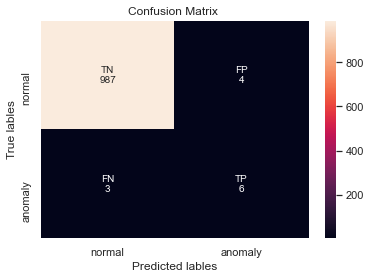

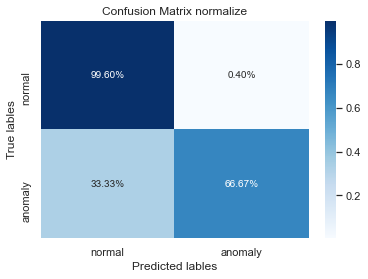

In [11]:
cm = Builder.calc_confusion_matrix(data,'Anomaly RSV IF')
Builder.plot_confusion_matrix(cm)

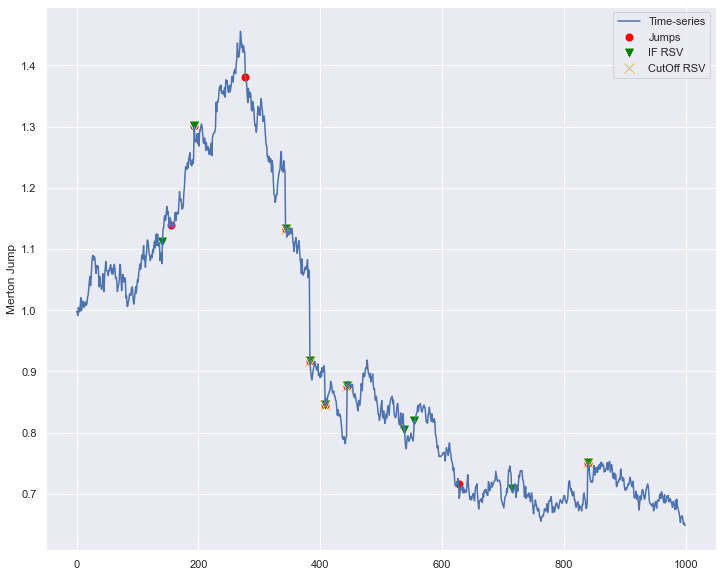

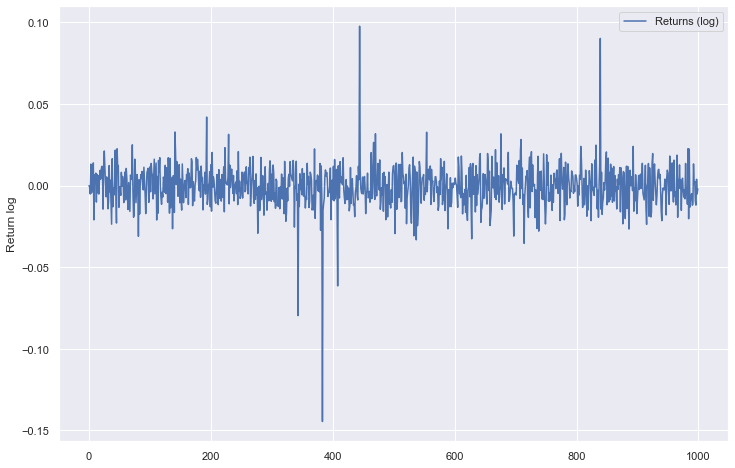

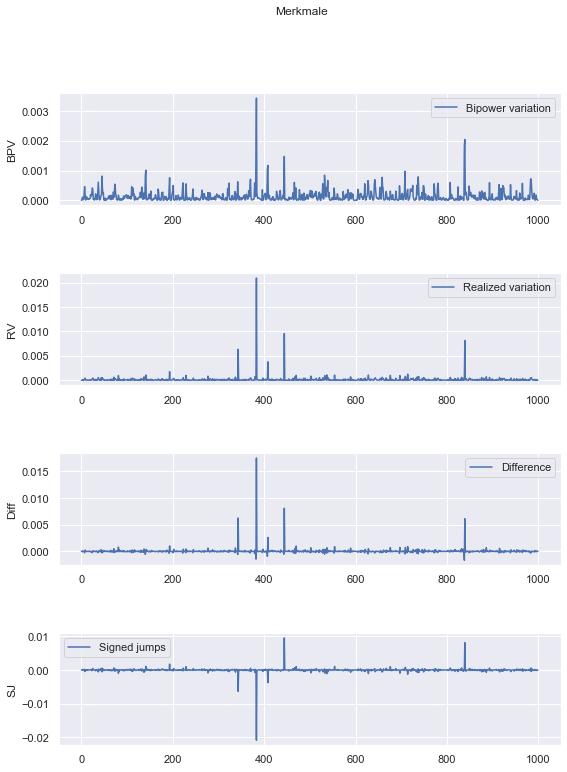

In [6]:
# precision = TP / TP+FP   # recall = TP / TP+FN
# interested in recall !!
Builder.plotter(data)

In [12]:
print('CutOff RSV')
Builder.class_report(data,'CutOff RSV')

CutOff RSV
              precision    recall  f1-score   support

      normal       1.00      1.00      1.00       991
     outlier       1.00      0.56      0.71         9

    accuracy                           1.00      1000
   macro avg       1.00      0.78      0.86      1000
weighted avg       1.00      1.00      1.00      1000



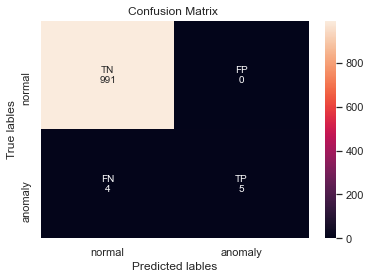

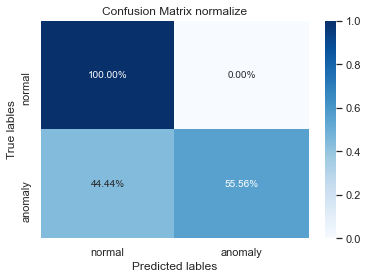

In [13]:
cm = Builder.calc_confusion_matrix(data,'CutOff RSV')
Builder.plot_confusion_matrix(cm)

In [9]:
#Builder.plotter(data)


In [10]:
# Versuch mit Trainingsdaten

X_train, X_test, y_train, y_test = train_test_split(data[['Return log']], data[['Jumps']], test_size=0.33,random_state=11)
clfIF = IsolationForest(max_samples =0.25, random_state=11, contamination=10/1000, n_estimators=100)
clfIF.fit(X_train,y_train)
y_pred_train = clfIF.predict(X_train)

df = pd.DataFrame(y_pred_train,columns=['Test'])
df_list = [0 if i ==1 else 1 for i in df['Test'].to_list()]

df['Test'] = df_list
print(classification_report(y_train['Jumps'], df['Test'], target_names=['normal','outlier']))

              precision    recall  f1-score   support

      normal       1.00      1.00      1.00       662
     outlier       0.86      0.75      0.80         8

    accuracy                           1.00       670
   macro avg       0.93      0.87      0.90       670
weighted avg       1.00      1.00      1.00       670

